<a href="https://colab.research.google.com/github/Kartik-Koul/102103819-SESS_LE1/blob/main/Statiscal_Analysis_102103819_Kartik_Koul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pydub

In [3]:
import tensorflow_datasets as tfds
import numpy as np
import librosa
import matplotlib.pyplot as plt

dataset, info = tfds.load('speech_commands', with_info=True, as_supervised=True)
train_data = dataset['train']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/85511 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.AXWSVN_0.0.3/speech_commands-train.tfrecord*...…

Generating validation examples...:   0%|          | 0/10102 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.AXWSVN_0.0.3/speech_commands-validation.tfrecor…

Generating test examples...:   0%|          | 0/4890 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.AXWSVN_0.0.3/speech_commands-test.tfrecord*...:…

Dataset speech_commands downloaded and prepared to /root/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.


In [4]:
def extract_features(audio, sample_rate):
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)

    spectrogram = np.abs(librosa.stft(audio))

    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    return mfccs, spectrogram, mfccs_mean, mfccs_std

def preprocess_sample(sample):
    audio_tensor, label = sample
    audio = audio_tensor.numpy()
    sample_rate = 16000

    audio = audio / np.max(np.abs(audio))

    mfccs, spectrogram, mfccs_mean, mfccs_std = extract_features(audio, sample_rate)

    return mfccs, spectrogram, mfccs_mean, mfccs_std

In [5]:
mfccs_means = []
mfccs_stds = []

for sample in train_data.take(100):
    _, _, mfcc_mean, mfcc_std = preprocess_sample(sample)
    mfccs_means.append(mfcc_mean)
    mfccs_stds.append(mfcc_std)

mfccs_means = np.array(mfccs_means)
mfccs_stds = np.array(mfccs_stds)

mean_mfccs = np.mean(mfccs_means, axis=0)
std_mfccs = np.mean(mfccs_stds, axis=0)

print(f"Mean of MFCCs across dataset: {mean_mfccs}")
print(f"Standard deviation of MFCCs across dataset: {std_mfccs}")

Mean of MFCCs across dataset: [-2.89827788e+02  7.84351091e+01 -4.98844965e+00  1.32067981e+01
 -8.99513645e+00  2.78411949e+00 -7.17611797e+00 -1.39761850e-01
 -5.60420364e+00 -1.87327139e-01 -7.04581280e+00  5.66116625e-01
 -5.18995889e+00]
Standard deviation of MFCCs across dataset: [127.58852662  46.98621251  26.95029531  22.25255607  20.14521007
  13.87782182  12.82725416  11.335855    10.03317287   9.3359951
   8.90618644   8.16616788   7.50853274]


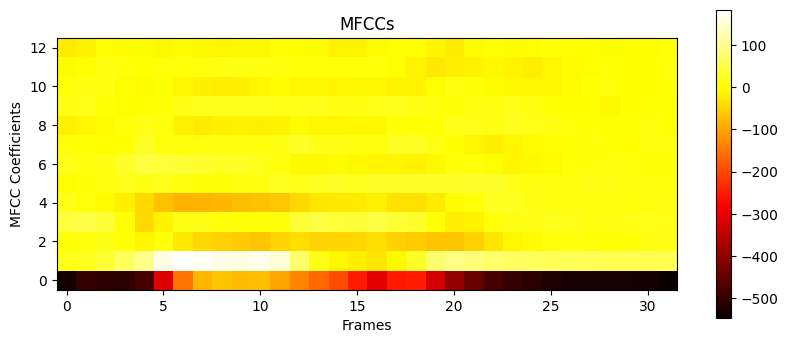

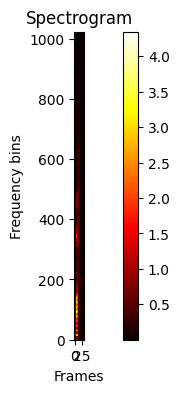

In [6]:
def plot_mfcc(mfccs):
    plt.figure(figsize=(10, 4))
    plt.imshow(mfccs, cmap='hot', interpolation='nearest', origin='lower')
    plt.title('MFCCs')
    plt.ylabel('MFCC Coefficients')
    plt.xlabel('Frames')
    plt.colorbar()
    plt.show()

def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))
    plt.imshow(np.log1p(spectrogram), cmap='hot', origin='lower')
    plt.title('Spectrogram')
    plt.ylabel('Frequency bins')
    plt.xlabel('Frames')
    plt.colorbar()
    plt.show()

for sample in train_data.take(1):
    mfccs, spectrogram, _, _ = preprocess_sample(sample)
    plot_mfcc(mfccs)
    plot_spectrogram(spectrogram)